# Algoritmo de Metropolis

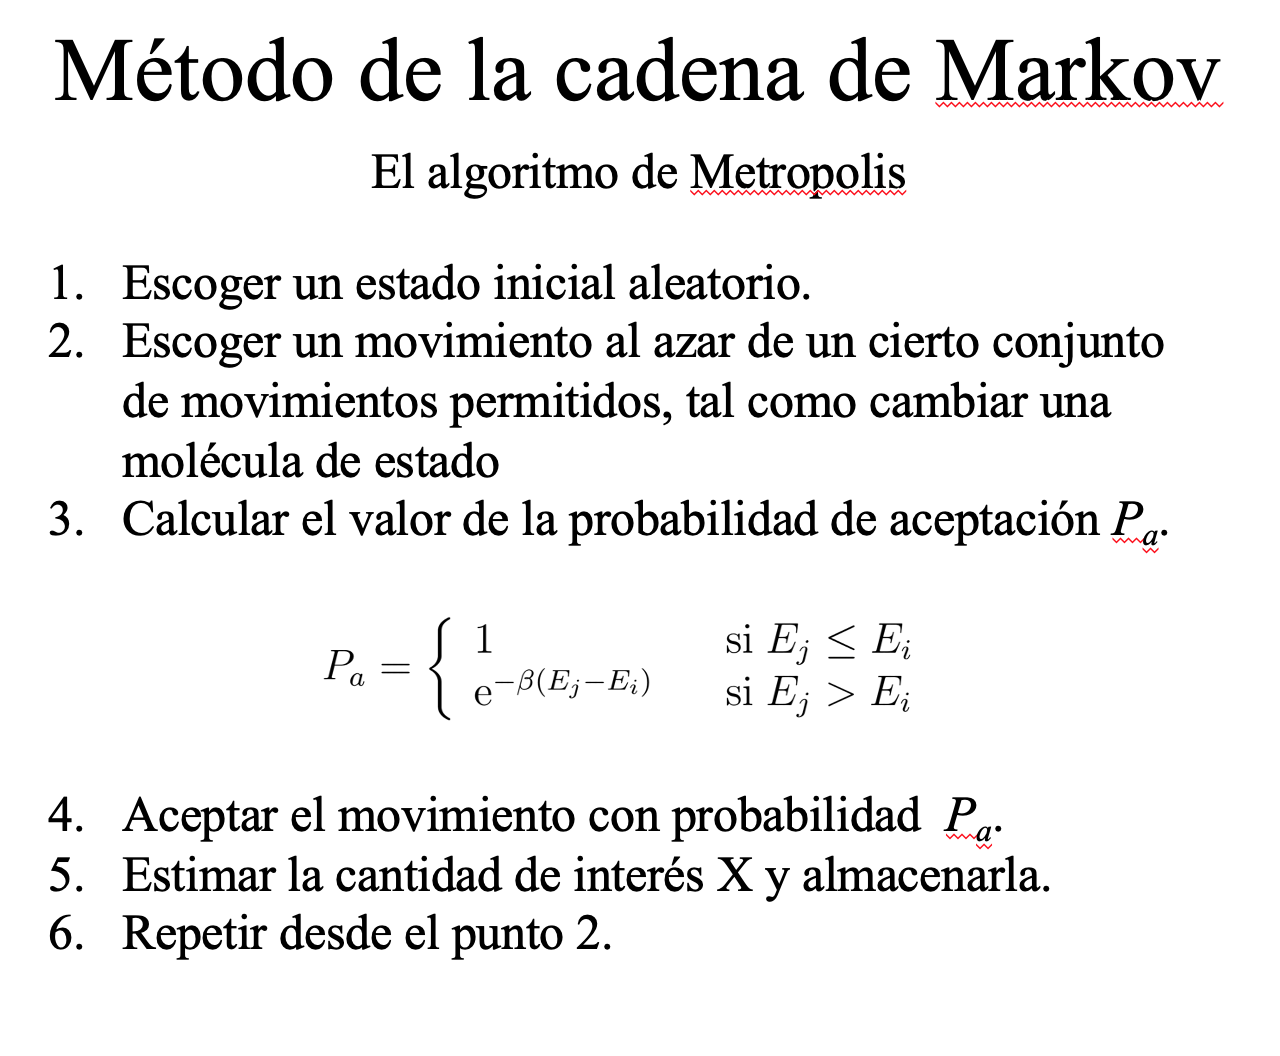

In [1]:
from IPython.display import Image
Image(filename = "AlgoritmoMetropolis.PNG",width = 600)

# Simulaciones de Monte Carlo de un gas ideal

Supongamos $N$ partículas no interactuántes en una caja de lado $L$. La energía de una partícula viene dada por
$$E(n_x,n_y,n_z) = \frac{\pi^2\hbar^2}{2mL^2}(n_x^2+n_y^2+n_z^2)$$
y la energía del sistema completo es:
$$ E = \sum_{i=1}^N E(n_x^{(i)},n_y^{(i)},n_z^{(i)}).$$
En cada paso solamente se permitirá  que un átomo en particular se pueda mover  a un estado adyacente. 
Se escogen al azar  el átomo, el $n_i$ y si el cambio es $\pm 1$. En cada moviemiento la diferencia de energía del
sistema será:
\begin{eqnarray}
\Delta E &=& \frac{\pi^2\hbar^2}{2mL^2}\left[ (n_i \pm 1)^2 + n_j^2 +n_k^2  \right ]-\frac{\pi^2\hbar^2}{2mL^2}\left[ n_i^2 + n_j^2 +n_k^2  \right ] \\
 &=& \frac{\pi^2\hbar^2}{2mL^2}(\pm 2n_i + 1)
\end{eqnarray}
Datos: $L=1$, $k_B T = 10$, Unidades: $m=\hbar=1$

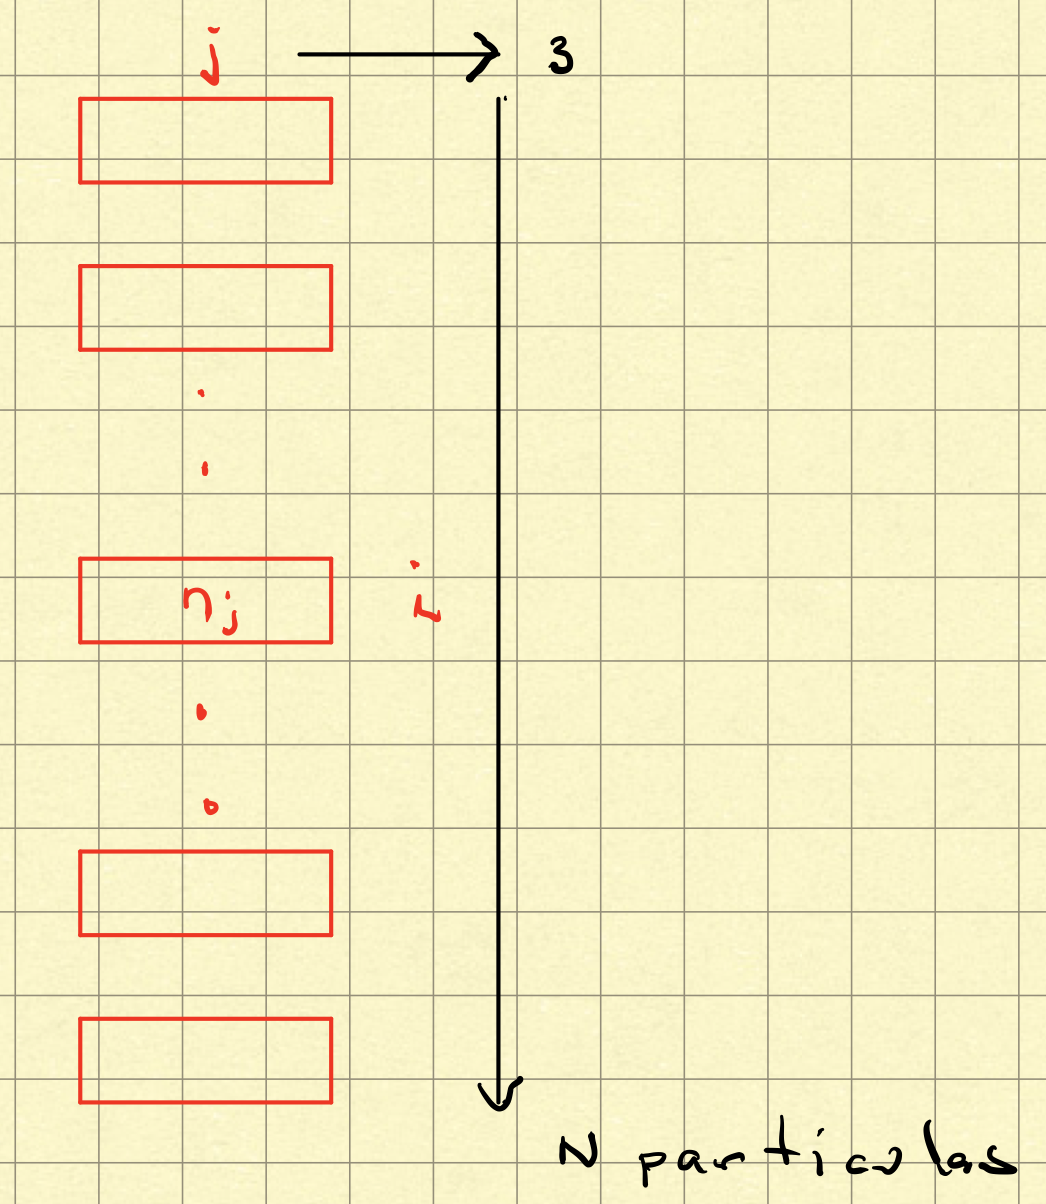

In [2]:
from IPython.display import Image
Image(filename = "QuantumBox.PNG",width = 400)

In [3]:
from random import random,randrange,seed
import numpy as np
import matplotlib.pyplot as plt 
import numpy.random as nr
import time

In [4]:
def MonteCarloQuantumBox(T,N,steps,n):
    # T: temperatura, N: número de partículas,
    # steps: pasos de Montecarlo, n: configuración inicial
    # Main loop
    eplot = [] #Almacena las energías en cada paso
    E = np.pi*np.pi/2*(n**2).sum()

    for k in range(steps):

        # Escogencia de la partícula y del número cuántico a cambiar
        i = randrange(N)
        j = randrange(3)
        if random()<0.5:
            dn = 1
            dE = (2*n[i,j]+1)*np.pi*np.pi/2
        else:
            dn = -1
            dE = (-2*n[i,j]+1)*np.pi*np.pi/2

        # Metropolis
        if n[i,j]>1 or dn==1: #Para evitar que caiga abajo del
                              #estado base
            if dn == -1 or random()< np.exp(-dE/T):
                n[i,j] += dn
                E += dE

        eplot.append(E)
    
    return np.array(eplot)/N


In [5]:
T = 10.0
N = 1000
steps = 500000
# Crear un arreglo 2d para almacenar los números cuánticos
n = np.ones([N,3],int) #todas la partículas están inicialmente en el estado base (no es aleatorio)
energia = MonteCarloQuantumBox(T,N,steps,n)

In [6]:
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('text',usetex = True)

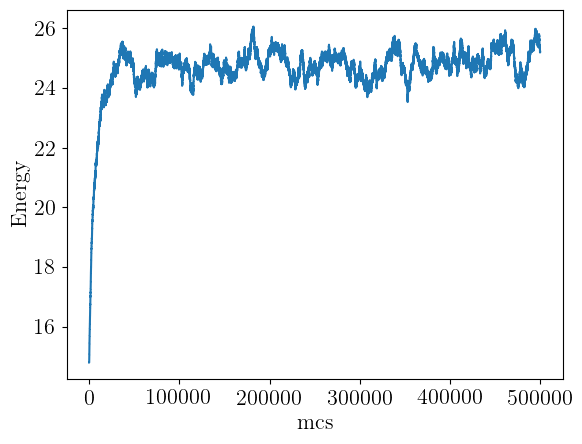

In [7]:
# Make the graph
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.show()

In [8]:
equil = 100000
eprom = energia[equil:].mean()
print(eprom)

24.810540448024906


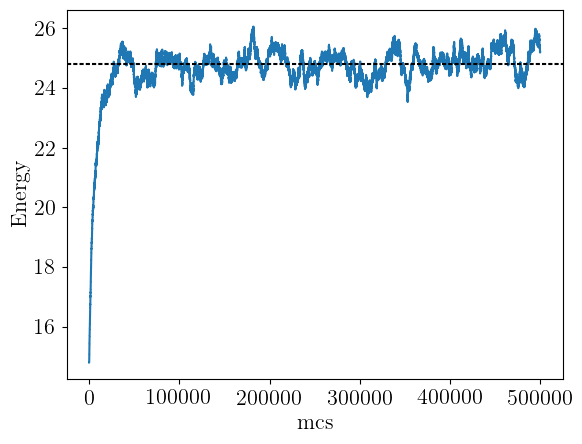

In [9]:
# Make the graph
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.axhline(eprom,color = 'black',dashes=(2,1))
plt.show()

Text(0.5, 0, '$N$')

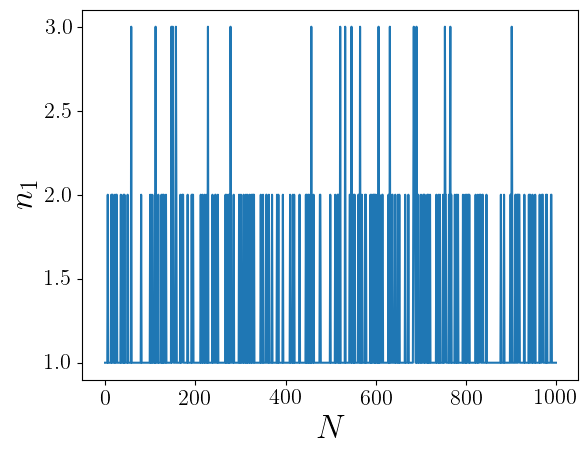

In [10]:
plt.plot(n[:,1])
plt.ylabel(r"$n_1$",fontsize = 24)
plt.xlabel(r'$N$',fontsize = 24)

#### ¿Qué pasa si cambiamos la condición inicial?

In [11]:
T = 10.0
N = 1000
steps = 500000
# Crear un arreglo 2d para almacenar los números cuánticos
n = nr.randint(1,10,(N,3)) #ala azar entre 1 y 50
energia2 = MonteCarloQuantumBox(T,N,steps,n)

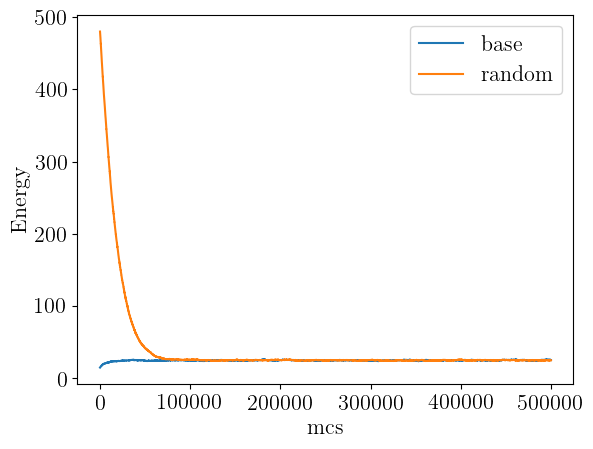

In [12]:
# Make the graph
plt.plot(energia,label = 'base')
plt.plot(energia2,label = 'random')
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.legend(loc ='upper right')
plt.show()

In [13]:
equil = 100000
eprom2 = energia2[equil:].mean()
print(eprom2)


24.92029648175089


#### ¿Qué pasa si simulamos una sola partícula?

In [14]:
T = 10.0
N = 1
steps = 500000
# Crear un arreglo 2d para almacenar los números cuánticos
n = np.ones([N,3],int) #todas la partículas están inicialmente en el estado base
energia = MonteCarloQuantumBox(T,N,steps,n)

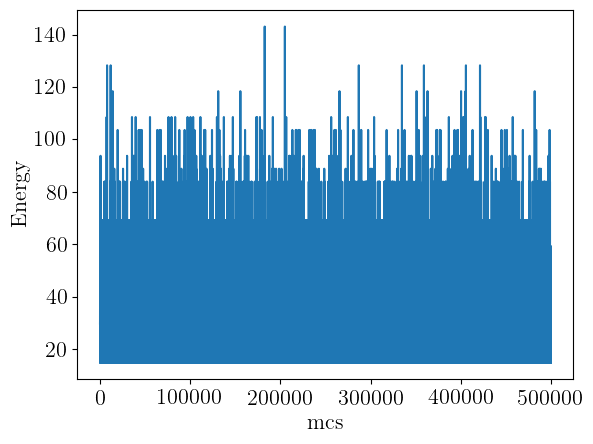

In [15]:
# Make the graph
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.show()

In [16]:
equil = 100000
eprom = energia[equil:].mean()
print(eprom)

24.858942715199554


#### ¿Qué pasa cuando elevamos la temperatura?

In [17]:
T = 10000.0
N = 1
steps = 10000000
# Crear un arreglo 2d para almacenar los números cuánticos
n = np.ones([N,3],int) #todas la partículas están inicialmente en el estado base
startTime  = time.process_time()
energia = MonteCarloQuantumBox(T,N,steps,n)
endTime  = time.process_time()
print('Duración Monte Carlo= {} s.'.format(endTime-startTime))

Duración Monte Carlo= 44.093037 s.


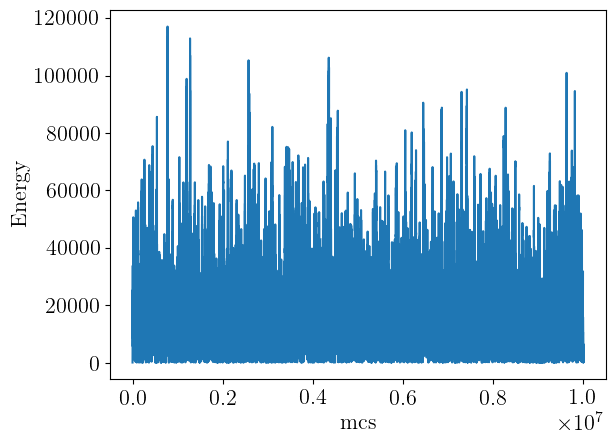

In [18]:
# Make the graph
plt.plot(energia)
plt.ylabel("Energy")
plt.xlabel('mcs')
plt.show()

In [19]:
equil = 100000
eprom = energia[equil:].mean()
print(eprom)
print((eprom - 1.5*T)/(1.5*T))

15356.926765807153
0.02379511772047687


**Equipartición de la energía**

Temperatura alta gas ideal clásico

# Simulación de una partícula en equilibrio con un baño térmico 
## (una dimensión)

La idea es simular un gas ideal clásico en una dimensión en contacto con un reservorio térmico a una temperatura $T$. Como las partículas no interactúan basta simular una sola partícula. 

In [20]:
from random import random,randrange,seed
import numpy as np
import matplotlib.pyplot as plt 
import time

In [21]:
def GasIdealClasicod1(T,v0,delta,steps):
    # T: temperatura, v0: velocidad inicial,
    # steps: pasos de Montecarlo, delta: varicacion máxima de v
    # Main loop
    beta = 1./T
    k0 = 0.5*v0*v0
    energia = [k0]
    Velocity = [v0]

    for mcs in range(steps):
        vprueba = v0  + (2*random()-1)*delta
        kprueba = 0.5*vprueba*vprueba
        dk = kprueba-k0
        if dk < 0 or random() < np.exp(-beta*dk):
            v0 = vprueba
            k0 = kprueba
        energia.append(k0)
        Velocity.append(v0)
    return np.array(energia),np.array(Velocity)

In [22]:
T = 10 #k_B T = 10
v0 = 10 #velocidad inicial
delta = 10 #maximo cambio de velocidades
steps = 1000000
energia,velocidad = GasIdealClasicod1(T,v0,delta,steps)

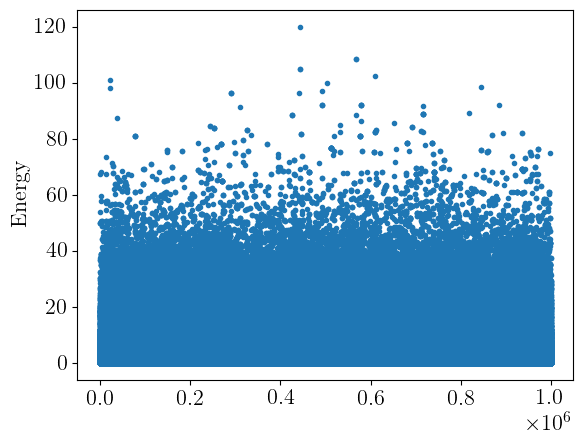

<E> = 4.986, kBT/2 = 5.00, error = 0.28%


In [23]:
# Make the graph
plt.plot(energia,'.')
plt.ylabel("Energy")
plt.show()
Eprom= np.mean(energia[1000:])
print('<E> = {0:.3f}, kBT/2 = {1:.2f}, error = {2:.2f}%'.format(Eprom,0.5*T,np.abs(Eprom-0.5*T)/(0.5*T)*100))

### Media por intervalo

In [26]:
import time

In [77]:
T = 10 #k_B T = 10
v0 = 10 #velocidad inicial
delta = 10 #maximo cambio de velocidades
steps = 10000000
startTime  = time.process_time()
energia,velocidad = GasIdealClasicod1(T,v0,delta,steps)
endTime  = time.process_time()
print('Duración Monte Carlo= {} s.'.format(endTime-startTime))

Duración Monte Carlo= 12.166921000000002 s.


## Utilizando facilidades vectoriales de numpy

In [78]:
def average_subarrays(arr, m):
    # Reshape el arreglo a una matriz de 'm' columnas
    reshaped = arr.reshape(-1, m)
    # Calcular el promedio de cada fila (subarreglo)
    averages = np.mean(reshaped, axis=1)
    return averages

In [79]:
m = 200000

In [80]:
prompasonp = average_subarrays(energia[:-1],m)
mcsnp = average_subarrays(np.arange(energia.size-1),m)

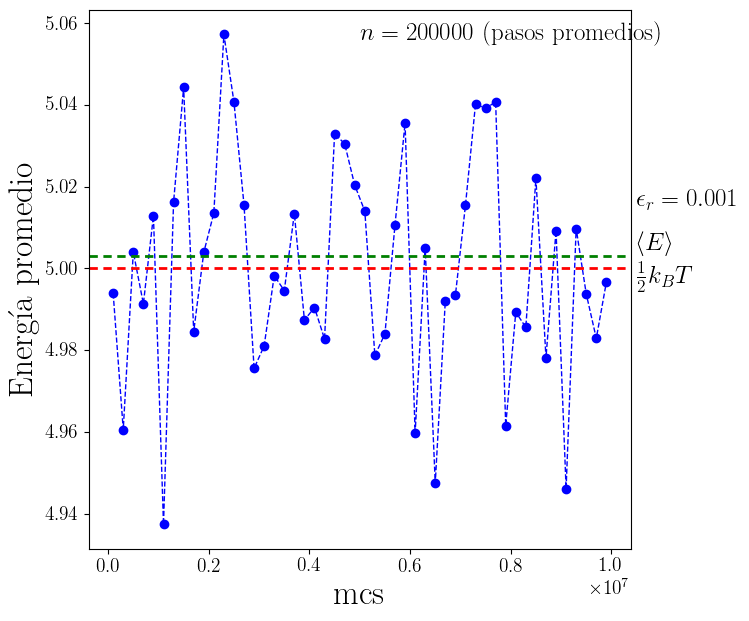

In [85]:
plt.rc('text', usetex=True) # Use with Latex
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize= (7,7))
plt.plot(mcsnp,prompasonp,'o--',color = 'blue')
plt.axhline(0.5*T,dashes = (3,2),color = 'red',linewidth = 2)
maximo = prompasonp.max()
minimo = prompasonp.min()
du = (maximo-minimo)
plt.text(1.05*steps,0.5*T-0.03*du,r'$\frac{1}{2}k_BT$',fontsize = 18)
plt.xlabel('mcs',fontsize = 24)
plt.ylabel('Energía promedio',fontsize = 24)
promedio = prompaso.mean()
clasico = 0.5*T
error = (promedio - clasico)/clasico
plt.text(1.05*steps,promedio+0.1*du,r'$\epsilon_r = {:4.3f}$'.format(error),fontsize = 18)
plt.axhline(promedio,dashes = (3,2),color = 'green',linewidth = 2)
plt.text(1.05*steps,promedio+0.01*du,r'$\langle E \rangle$',fontsize = 18)
plt.text(0.5*steps,maximo-0.01*du,r'$n = {}$ (pasos promedios)'.format(m),fontsize = 18)
plt.show()

## Sin facilidades vectoriales de numpy

In [40]:
startTime  = time.process_time()
n = 2000000
dn = 200000
prompaso = np.array([])
for i in range(0,steps-n,dn):
    prompar = energia[i:i+n].mean()
    prompaso = np.append(prompaso,prompar)
    
endTime  = time.process_time()
print('Duración promedio por paso= {} s.'.format(endTime-startTime))

Duración promedio por paso= 0.039551000000003 s.


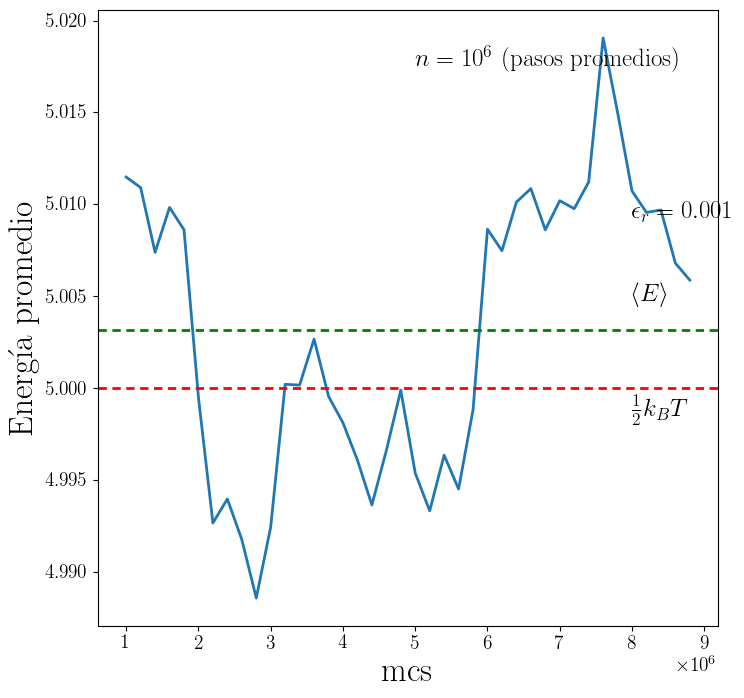

In [49]:
plt.rc('text', usetex=True) # Use with Latex
plt.rcParams['font.size'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.family'] = 'serif'
xmcs = np.arange(n/2,steps-n/2,dn)
plt.figure(figsize= (8,8))
plt.plot(xmcs,prompaso)
plt.axhline(0.5*T,dashes = (3,2),color = 'red')
maximo = prompaso.max()
minimo = prompaso.min()
du = 0.05*(maximo-minimo)
plt.text(0.8*steps,0.5*T-du,r'$\frac{1}{2}k_BT$',fontsize = 18)
plt.xlabel('mcs',fontsize = 24)
plt.ylabel('Energía promedio',fontsize = 24)
promedio = prompaso.mean()
clasico = 0.5*T
error = (promedio - clasico)/clasico
plt.text(0.8*steps,promedio+4*du,r'$\epsilon_r = {:4.3f}$'.format(error),fontsize = 18)
plt.axhline(promedio,dashes = (3,2),color = 'green')
plt.text(0.8*steps,promedio+du,r'$\langle E \rangle$',fontsize = 18)
expon = int(np.log10(n))
plt.text(0.5*steps,maximo-du,r'$n = 10^{:1d}$ (pasos promedios)'.format(expon),fontsize = 18)
plt.show()

### Distribución de velocidades

Text(2.5, 0.12, '$P_B(v) = \\sqrt{\\beta m/2\\pi}\\,\\exp(-\\beta m v^2/2)$')

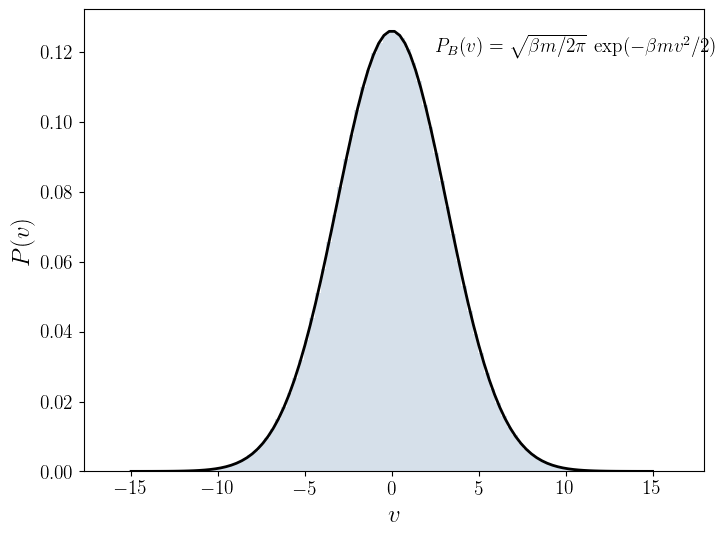

In [30]:
otrocolor = [(0.2, 0.4, 0.6, 0.2)]
beta = 1/T
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(velocidad, bins = 100,color = otrocolor,density = True)
x = np.linspace(-15,15,100)
Pb = np.sqrt(beta/(2*np.pi))*np.exp(-beta*x**2/2)
plt.plot(x,Pb,'k-')
plt.ylabel(r'$P(v)$',fontsize = 18)
plt.xlabel(r'$v$',fontsize = 18)
plt.text(2.5,0.12,r'$P_B(v) = \sqrt{\beta m/2\pi}\,\exp(-\beta m v^2/2)$')

# El modelo de Ising

Supongamos que tenemos $N$ partículas de spin $1/2$ dispuestos es una red. Supongamos que dichos spines interactúan vía un término de intercambio. La energía del sistema vendrá dada por:
$$ E = -\sum_{i\ne j} J_{ij} s_is_j $$
Supongamos que solamente hay interacción entre primeros vecinos, la energía del sistema de $N$ spines será:
$$ E = -J \sum_{\langle ij\rangle} s_is_j $$
Supongamos incialmente que nuestra red es cuadrada y que hay condiciones de borde periódicas en la frontera.

## Programa de Metropolis para el modelo de Ising

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

* Consideraremos como variables globales todo aquello que tenga que ver conla estructura del sistema que estamos modelando

* L: longitud de la red

* N: número de spines

* nn[s,j]: vecino j sel sitio s (Condiciones de borde periódicas)

* red[s]: areglo unidimensional que guarda en las posiciones de los spines del sistema <font color = blue>(Esta no la consideraremos global pero observaremos lo que pasa)

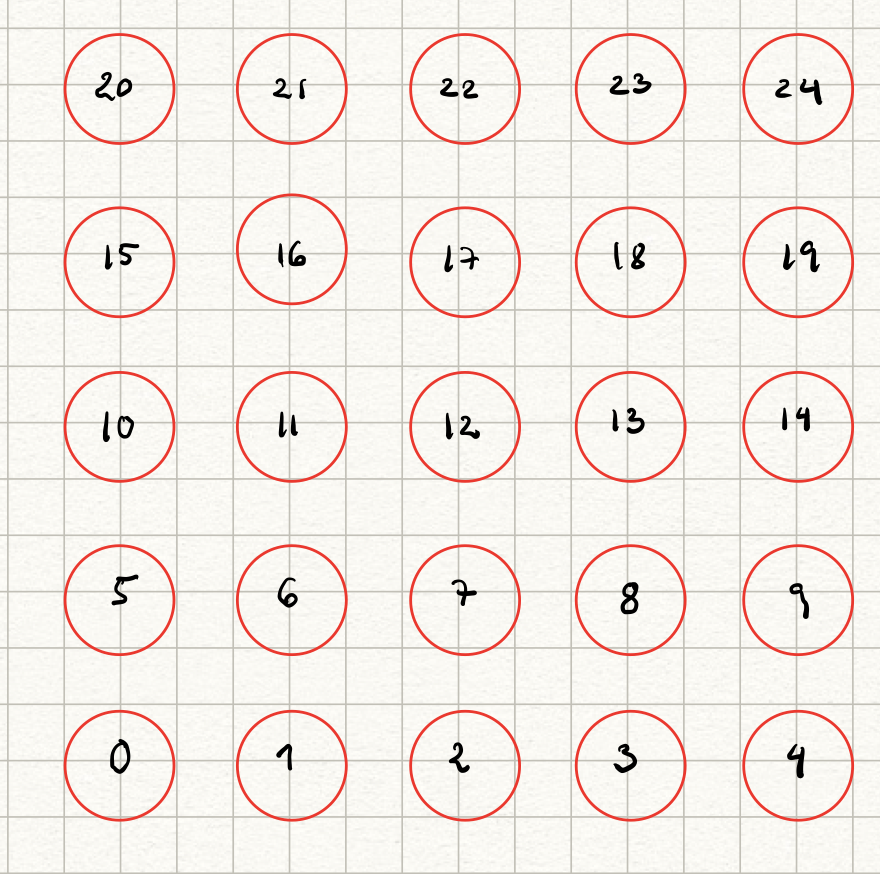

In [ ]:
from IPython.display import Image
Image("PBCL=5.png", width=400, height=400)

\begin{equation}
L = 5, \quad N = 25
\end{equation}

In [3]:
# Estableciendo los vecinos de cada sito s
def vecino(s,j):
    global L,N
    if j == 0: #derecha
        if s%L ==L-1:
            return s-L+1
        else:
            return s+1
    elif j==1: #arriba
        if s//L == L-1:
            return s%L
        else:
            return s+L
    elif j==2: #izquierda
        if s%L == 0:
            return s+L-1
        else:
            return s-1
    elif j==3: #abajo
        if s//L == 0:
            return N-L+s
        else:
            return s-L
                
def boundaries():
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

Lo primero que hay que hacer el porbar si estas funciones están correctas

In [4]:
global L,N,nn
L = 5
N = L*L

nn = np.zeros((N,4),dtype = int)

boundaries()

In [5]:
s = int(input('¿A qué sitio quiere verle los vecinos?' ))
print(nn[s])

¿A qué sitio quiere verle los vecinos?10
[11 15 14  5]


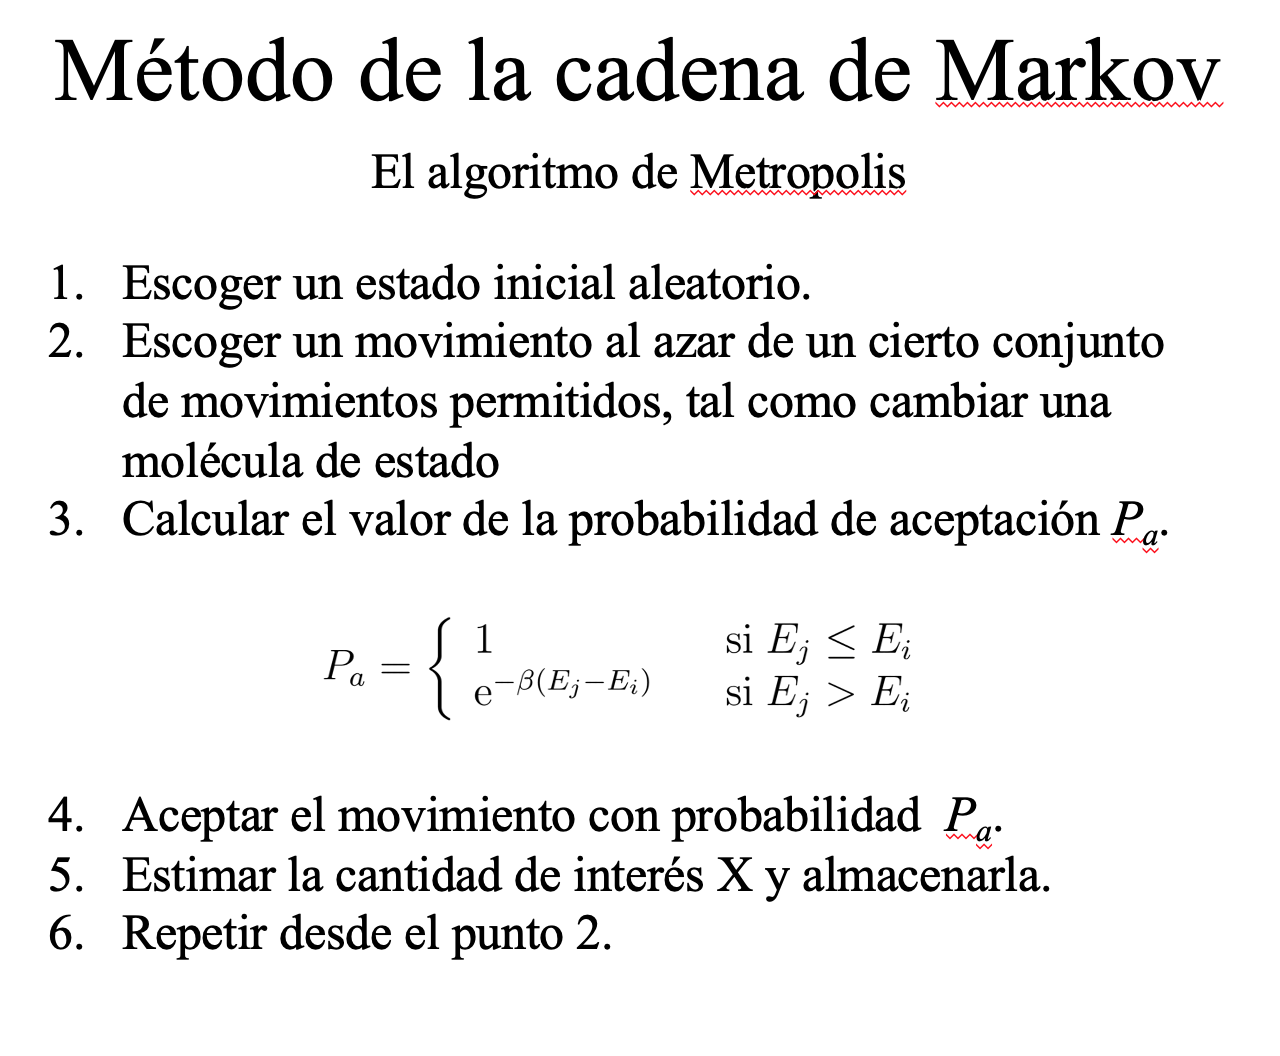

In [6]:
from IPython.display import Image
Image(filename = "AlgoritmoMetropolis.PNG",width = 600)

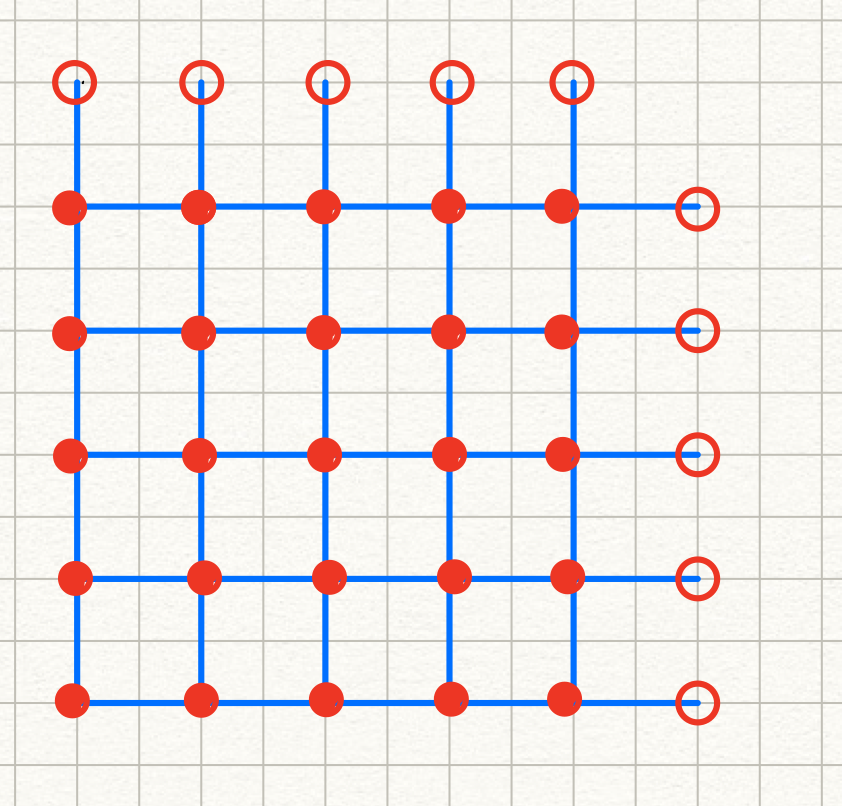

In [7]:
Image(filename = "energia-calculo.png",width = 400)

Cada paso de Montecarlo realizaremos un pequeño cambio del sistema cambiando la dirección de un spin tomado al azar

El cambio de la magnetización sería:
\begin{equation}
\Delta M = s^\prime - s = \pm 2
\end{equation}

El cambio de la energía sería

\begin{equation}
\Delta E = -J \sum_{j=0}^4 s^\prime s_j -\left (-J \sum_{j=0}^4 s s_j\right ) = -J\, \Delta M \sum_{j=0}^4 s_j
\end{equation}

Los únicos cambios serían:
\begin{equation}
\Delta E = J \times \{ \pm 8, \pm 4, 0\}
\end{equation}


In [8]:
def IsingSquare(Nmcs,T,red):
#Nmcs: número total de pasos de Montecarlo
#T: temperatura
#red: entra como configuración inicial
#Unidades donde kb = 1 y J = 1
    global L,N,nn
    beta = 1/T
    J=1
    mag = red.sum() #Magnetizacion inicial
    Mag = [mag/N]  #Magnetizacion por particula
    ener = 0.
    for s in range(N):
        for j in range(2):
            ener += red[s]*red[nn[s,j]]
    ener = -J*ener #Energía inicial
    Energy = [ener/N] #Energía por partícula
    expon = {4:np.exp(-J*beta*4),8:np.exp(-J*beta*8)}
    for mcs in range(Nmcs):
        sr = np.random.randint(N) #escogo un sitio al azar
        dm = -2*red[sr] #posible cambio en mag
        de = 0
        for j in range(4):
            de += red[nn[sr,j]]
        de = -dm*de #posible cambio en ener (sin inclurir J)
    #Cambio de Metropolis
        if de <= 0 or np.random.random() < expon[de]:        
            ener += J*de
            mag += dm
            red[sr] = -red[sr]
        Mag.append(mag/N)
        Energy.append(ener/N)
    return np.array(Mag),np.array(Energy)

### Resultados exactos en d=2 para el modelo de Ising

$$ \frac{k_BT_c}{J}= \frac{2}{\ln(1+\sqrt{2})}\approx 2.27 $$

### Simulación para un $T$ menor que $T_c$

In [ ]:
global L,N,nn
T = 1. 
L=16
N=L*L
Nmcs = 2000000
#Desordenado
#red = np.random.choice([1, -1],N)
#Ordenado 
red = np.ones(N)
nn = np.zeros((N,4),dtype='uint32')
boundaries()
startTime  = time.process_time()
Mag, Energy = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

In [ ]:
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('text',usetex = True)

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
#ax1.plot(np.abs(Mag),'b-',label = ("T=%4.2f" %T))
ax1.plot(np.abs(Mag),'g-',label = '$T= $ {:.2f}'.format(T))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$M$',fontsize = 18)
ax1.set_title('Magnetización',fontsize = 24)

ax1 = fig.add_subplot(2, 1, 2)
#ax1.plot(Energy,'b-',label = ("T=%4.2f" %T))
ax1.plot(Energy,'g-',label = '$T= $ {:.2f}'.format(T))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$E$',fontsize = 18)
ax1.set_title('Energía',fontsize = 24)

fig.tight_layout()
plt.savefig('resultado2a.png')
plt.show()

In [ ]:
print('Magnetización por spin promedio = ',round(np.abs(Mag[1000000:]).mean(),3))

In [ ]:
print('Energía por spin  promedio = ',round(Energy[1000000:].mean(),3))

In [ ]:
Magord = np.copy(Mag)
Energyord = np.copy(Energy)

In [ ]:
global L,N,nn
T = 1. 
L=16
N=L*L
Nmcs = 2000000
#Desordenado
red = np.random.choice([1, -1],N)
nn = np.zeros((N,4),dtype='uint32')
boundaries()
startTime  = time.process_time()
Mag, Energy = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
#ax1.plot(np.abs(Mag),'b-',label = ("T=%4.2f" %T))
ax1.plot(np.abs(Mag),'b-',label = '$T= $ {:.2f} desordenado'.format(T))
ax1.plot(np.abs(Magord),'g-',label = '$T= $ {:.2f} ordenado'.format(T))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$M$',fontsize = 18)
ax1.set_title('Magnetización',fontsize = 24)

ax1 = fig.add_subplot(2, 1, 2)
#ax1.plot(Energy,'b-',label = ("T=%4.2f" %T))
ax1.plot(Energy,'b-',label = '$T= $ {:.2f} desordenado'.format(T))
ax1.plot(Energyord,'g-',label = '$T= $ {:.2f} ordenado'.format(T))
ax1.legend(loc = 'best', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$E$',fontsize = 18)
ax1.set_title('Energía',fontsize = 24)

fig.tight_layout()
plt.savefig('resultado2a.png')
plt.show()

 ### Comparación de equlibración para Tc

In [ ]:
import numpy as np
import time

global L,N,nn
T = 2.26918531421
L=16
N=L*L
Nmcs = 2000000
nn = np.zeros((N,4),dtype='uint32')
boundaries()
#Desordenado
red = np.random.choice([1, -1],N)
startTime  = time.process_time()
MagTcd, EnergyTcd = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))
#Ordenado
red = np.ones(N)
startTime  = time.process_time()
MagTco, EnergyTco = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(np.abs(MagTco),'b-',label = 'odenado')
ax1.plot(np.abs(MagTcd),'g-',label = 'desordenado')
ax1.legend(loc = 'lower right', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$M$',fontsize = 18)
ax1.set_title('Magnetización',fontsize = 24)

ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(EnergyTco,'b-',label = 'ordenado')
ax1.plot(EnergyTcd,'g-',label = 'desordenado')
ax1.legend(loc = 'upper right', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$E$',fontsize = 18)
ax1.set_title('Energía',fontsize = 24)

fig.tight_layout()
plt.savefig('resultado2a.png')
plt.show()

In [ ]:
print(np.abs(MagTco[1000000:]).mean(),np.abs(MagTcd[1000000:]).mean())
print(EnergyTco[1000000:].mean(),EnergyTcd[1000000:].mean())

In [ ]:
del MagTco,MagTcd
del EnergyTco,EnergyTcd

In [ ]:
global L,N,nn
L=32
N=L*L
nn = np.zeros((N,4),dtype='uint32')
boundaries()
Nmcs = 2000000
#Caso I
T = 1. 
#Ordenado
red = np.ones(N)
startTime  = time.process_time()
MagT1, EnergyT1 = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('T = {:.2f}, Tiempo de cómputo = {:.2f} segundos'.format(T,endTime-startTime))

#Caso I
T = 2.26918531421
#Ordenado
red = np.ones(N)
startTime  = time.process_time()
MagTc, EnergyTc = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('T = Tc, Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

#Caso I
T = 4.
#Desordenado
red = np.random.choice([1, -1],N)
startTime  = time.process_time()
MagT4, EnergyT4 = IsingSquare(Nmcs,T,red)
endTime  = time.process_time()
print('T = {:.2f}, Tiempo de cómputo = {:.2f} segundos'.format(T,endTime-startTime))

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
#ax1.plot(np.abs(Mag),'b-',label = ("T=%4.2f" %T))
ax1.plot(np.abs(MagT1),'b-',label = 'T=1')
ax1.plot(np.abs(MagTc),'r-',label = 'T=Tc')
ax1.plot(np.abs(MagT4),'g-',label = 'T=4')
ax1.legend(loc = 'lower left', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$M$',fontsize = 18)
ax1.set_title('Magnetización',fontsize = 24)

ax1 = fig.add_subplot(2, 1, 2)
#ax1.plot(Energy,'b-',label = ("T=%4.2f" %T))
ax1.plot(EnergyT1,'b-',label = 'T=1')
ax1.plot(EnergyTc,'r-',label = 'T=Tc')
ax1.plot(EnergyT4,'g-',label = 'T=4')
ax1.legend(loc = 'lower left', fontsize = 14)
ax1.set_xlabel(r'$mcs$',fontsize = 18)
ax1.set_ylabel(r'$E$',fontsize = 18)
ax1.set_title('Energía',fontsize = 24)

fig.tight_layout()
plt.savefig('resultado2a.png')
plt.show()

In [ ]:
from IPython.display  import display, Math, Latex
display(Math(f'E_1 = {round(EnergyT1[1000000:].mean(),2)}, E_c = {round(EnergyTc[1000000:].mean(),2)},E_4 = {round(EnergyT4[1000000:].mean(),2)}'))
display(Math(f'M_1 = {round(np.abs(MagT1)[1000000:].mean(),2)}, M_c = {round(np.abs(MagTc)[1000000:].mean(),2)},M_4 = {round(np.abs(MagT4)[1000000:].mean(),2)}'))

In [ ]:
del EnergyT1,EnergyTc,EnergyT4
del MagT1,MagTc,MagT4

## Simulación en $T_c$. Histogramas

In [20]:
global L,N,nn
T = 2/np.log(1+np.sqrt(2))
L=1024
N=L*L
Nmcs = 10000000
nn = np.zeros((N,4),dtype='uint32')
boundaries()
#Desordenado
red = np.random.choice([1, -1],N)
startTime  = time.time()
MagTcd, EnergyTcd = IsingSquare(Nmcs,T,red)
endTime  = time.time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

Tiempo de cómputo = 27.66 segundos


In [54]:
Nmcs = 100000000
startTime  = time.time()
MagTcd, EnergyTcd = IsingSquare(Nmcs,T,red)
endTime  = time.time()
print('Tiempo de cómputo = {:.2f} segundos'.format(endTime-startTime))

Tiempo de cómputo = 291.60 segundos


In [51]:
Histo,Bins = np.histogram(MagTcd,bins = 51,range = (-0.01,0.01),density = True)

In [48]:
bins = (Bins[:-1]+Bins[1:])/2


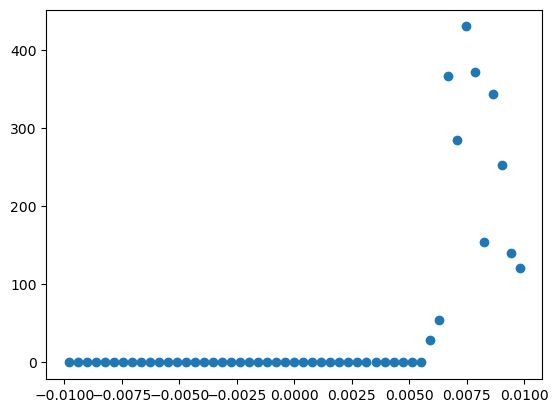

In [52]:
plt.plot(bins,Histo,'o')

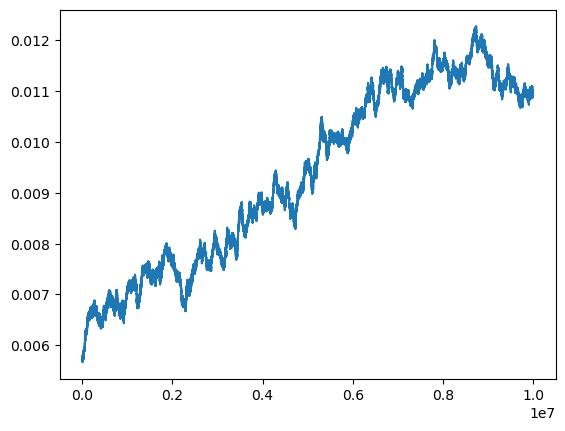

In [53]:
plt.plot(MagTcd)

In [56]:
20*3600/700

102.85714285714286

### Teorema de fluctuación disipación

**Capacidad Calorífica:**
    
\begin{equation}
C = \frac{1}{k_BT^2}\left ( \langle E^2 \rangle - \langle E \rangle^2 \right )
\end{equation}
donde $E$ es la energía (no por partícula)

**Suceptibilidad Magnética :**
    
\begin{equation}
\chi  = \frac{1}{k_BT}\left ( \langle M^2 \rangle - \langle M \rangle^2 \right )
\end{equation}
donde $M$ es el valor absoluto de la magnetización  (no por partícula)

# Recocido simulado

In [ ]:
from IPython.display import Image
Image(filename = "RecocidoSimulado.PNG",width = 600)

\begin{equation}
T = T_{max}\exp(-t/\tau)
\end{equation}

In [ ]:
from IPython.display import Image
Image(filename = "AgenteViajero.PNG",width = 600)

In [ ]:
from math import sqrt,exp
from numpy import empty
from random import random,randrange
import time 

from vpython import sphere,curve,rate,vector,mag,canvas
#from visual import sphere,curve,display,rate

In [ ]:
N = 25
R = 0.02 #Para vpython
Tmax = 10.0
Tmin = 1e-3
tau = 1e4

# Function to calculate the magnitude of a vector
#def mag(x):
#    return sqrt(x[0]**2+x[1]**2)

# Function to calculate the total length of the tour
def distance():
    s = 0.0
    for i in range(N):
        s += mag(r[i+1]-r[i])
    return s

# Choose N city locations and calculate the initial distance

startTime  = time.process_time()
r = []
for i in range(N):
    r.append(vector(random(),random(),0))
r.append(r[0]) #Coloca como posición final a la inical

D = distance()
Distancia = [D]
# Set up the graphics
canvas(center=vector(0.5,0.5,0))
for i in range(N):
    sphere(pos=r[i],radius=R)
l = curve(pos=r,radius=R/2)

# Main loop
t = 0
T = Tmax
while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Update the visualization every 100 moves
    if t%100==0:
        l.visible = False
        l = curve(pos=r,radius=R/2)
        rate(25)

    # Choose two cities to swap and make sure they are distinct
    i,j = randrange(1,N),randrange(1,N)
    while i==j:
        i,j = randrange(1,N),randrange(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    dummy = r[i]
    r[i] = r[j]
    r[j] = dummy
    D = distance()
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if random()>exp(-deltaD/T):
        dummy = r[i]
        r[i] = r[j]
        r[j] = dummy
        D = oldD
    Distancia.append(D)

endTime  = time.process_time()
print('Duración Agente Viajero = {} s.'.format(endTime-startTime))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True) # Use with Latex
plt.figure(figsize= (8,8))
plt.plot(Distancia,'b-')
plt.ylabel(r'$D$', fontsize = 24)
plt.xlabel('pasos',fontsize = 24)
n = len(Distancia)
maximo = max(Distancia)
dist = maximo - Distancia[n-1]
plt.text(0.8*n,Distancia[n-1]+0.05*dist,r'$D_m = {:.4f}$'.format(Distancia[n-1]),fontsize = 18)
plt.show()

## Utilizando numpy

In [ ]:
import numpy as np
import numpy.random as nr
import time
from IPython.display  import display, Math, Latex

In [ ]:
def distance(r,N):
    s = np.linalg.norm(r[1:]-r[:N],axis=1).sum()
    return s

In [ ]:
#Prueba construcción del vector r
N = 5
#Generación de las posiciones de los puntos
rfix = nr.random((N,2))
print(rfix,'\n')
print(rfix[0],'\n')
a = np.reshape(rfix[0],(1,2))
print(a,'\n')
rfix = np.append(rfix,a,axis=0)  # r[N]=r[0]
del(a)
print(rfix)

Genero las posiciones de todas las ciudades, **rfix**, aparte  del porgrama principal  para realizar comparaciones 

In [ ]:
N = 25
#Generación de las posiciones de los puntos
rfix = nr.random((N,2))
a = np.reshape(rfix[0],(1,2))
rfix = np.append(rfix,a,axis=0)  # r[N]=r[0]
del(a)

In [ ]:
startTime = time.process_time()

Tmax = 10.0
Tmin = 1e-3
tau = 1e4


r = np.copy(rfix)
D = distance(r,N)
Distancia = [D]

t = 0
T = Tmax

while T>Tmin:

    # Cooling
    t += 1
    T = Tmax*exp(-t/tau)

    # Choose two cities to swap and make sure they are distinct
    i,j = nr.randint(1,N),nr.randint(1,N)
    while i==j:
        i,j = nr.randint(1,N),nr.randint(1,N)

    # Swap them and calculate the change in distance
    oldD = D
    dummy = np.copy(r[i])
    r[i] = np.copy(r[j])
    r[j] = np.copy(dummy)
    D = distance(r,N)
    deltaD = D - oldD

    # If the move is rejected, swap them back again
    if nr.random() > np.exp(-deltaD/T):
        dummy = np.copy(r[i])
        r[i] = np.copy(r[j])
        r[j] = np.copy(dummy)
        D = oldD
    Distancia.append(D)

print('Tiempo de computo = {} s'.format(round(time.process_time()-startTime),3))

display(Math(f'D_m= {round(D,3)}'))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True) # Use with Latex
plt.figure(figsize= (8,8))
plt.plot(Distancia,'b-')
plt.ylabel(r'$D$', fontsize = 24)
plt.xlabel('pasos',fontsize = 24)
n = len(Distancia)
maximo = max(Distancia)
dist = maximo - Distancia[n-1]
plt.text(0.8*n,Distancia[n-1]+0.05*dist,r'$D_m = {:.4f}$'.format(Distancia[n-1]),fontsize = 18)
plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(N):
    circ = plt.Circle((r[i,0], r[i,1]), 0.01,color='b')
    ax.add_patch(circ) 
#plt.plot(r[:,0],r[:,1],'bo')
ax.plot(r[:,0],r[:,1],'b-')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel(r'$y$',fontsize = 18)
ax.set_xlabel(r'$x$',fontsize = 18)

In [ ]:
def AgenteViajero(rfix,N,Tmax,Tmin,tau):
    r = np.copy(rfix)
    D = distance(r,N)
    Distancia = [D]

    t = 0
    T = Tmax

    while T>Tmin:

        # Cooling
        t += 1
        T = Tmax*exp(-t/tau)

        # Choose two cities to swap and make sure they are distinct
        i,j = nr.randint(1,N),nr.randint(1,N)
        while i==j:
            i,j = nr.randint(1,N),nr.randint(1,N)

        # Swap them and calculate the change in distance
        oldD = D
        dummy = np.copy(r[i])
        r[i] = np.copy(r[j])
        r[j] = np.copy(dummy)
        D = distance(r,N)
        deltaD = D - oldD

        # If the move is rejected, swap them back again
        if nr.random() > np.exp(-deltaD/T):
            dummy = np.copy(r[i])
            r[i] = np.copy(r[j])
            r[j] = np.copy(dummy)
            D = oldD
        Distancia.append(D)

    return r,Distancia

In [ ]:
Tmax = 10.0
Tmin = 1e-3
tau = 1e4
trials = 20
Dmin = []
for _ in range(trials):
    startTime = time.process_time()
    rfin,Distancia = AgenteViajero(rfix,N,Tmax,Tmin,tau)
    print(r'proces = {:.2f} s, D_min = {:.4f}'.format(time.process_time()-startTime,Distancia[-1]))
    Dmin.append(Distancia[-1])

In [ ]:
Dmin_1e3 = Dmin.copy()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True) # Use with Latex
plt.figure(figsize= (8,8))
plt.plot(Dmin_1e3,'bo',label = r'$\tau = 10^5$')
#plt.plot(Dmin_1e6,'ro',label = r'$\tau = 10^6$')
plt.ylabel(r'$D_{min}$',fontsize = 24)
plt.xlabel(r'muestras',fontsize = 24)
plt.legend(loc = 'best')
#plt.axhline(min(Dmin_1e6),color = 'black',dashes=(2,1))
plt.show()

In [ ]:
Dmin_1e5 = np.loadtxt('Agente-Dmin_1e5.txt',unpack = True)

In [ ]:
Dmin_1e6 = np.loadtxt('Agente-Dmin_1e6.txt',unpack = True)

In [ ]:
Dmin_1e7 = np.loadtxt('Agente-Dmin_1e7.txt',unpack = True)

In [ ]:
print(Dmin_1e7)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True) # Use with Latex
plt.figure(figsize= (8,8))
plt.plot(Dmin_1e5,'bo',label = r'$\tau = 10^5$')
plt.plot(Dmin_1e6,'ro',label = r'$\tau = 10^6$')
plt.ylabel(r'$D_{min}$',fontsize = 24)
plt.xlabel(r'muestras',fontsize = 24)
plt.legend(loc = 'best')
plt.axhline(Dmin_1e7,color = 'black',dashes=(2,1))
plt.show()

In [ ]:
rfix2 = np.loadtxt('Agente-r-2.txt',unpack = True).T

In [ ]:
Tmax = 10.0
Tmin = 1e-3
tau = 1e4
trials = 20
Dmin = []
for _ in range(trials):
    startTime = time.process_time()
    rfin,Distancia = AgenteViajero(rfix2,N,Tmax,Tmin,tau)
    print(r'proces = {:.2f} s, D_min = {:.4f}'.format(time.process_time()-startTime,Distancia[-1]))
    Dmin.append(Distancia[-1])

In [ ]:
Dmin_1e4 = Dmin.copy()

In [ ]:
np.savetxt('Agente-r-2.txt',rfix)
np.savetxt('Agente-Dmin_1e5-2.txt',Dmin_1e5)
np.savetxt('Agente-Dmin_1e6-2.txt',Dmin_1e6)
np.savetxt('Agente-Dmin_1e7-2.txt',Dmin_1e7)

In [ ]:
Dmin_1e5 = np.loadtxt('Agente-Dmin_1e5-2.txt',unpack = True)
Dmin_1e6 = np.loadtxt('Agente-Dmin_1e6-2.txt',unpack = True)
Dmin_1e7 = np.loadtxt('Agente-Dmin_1e7-2.txt',unpack = True)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
plt.rc('text', usetex=True) # Use with Latex
plt.figure(figsize= (8,8))
plt.plot(Dmin_1e4,'go',label = r'$\tau = 10^4$')
plt.plot(Dmin_1e5,'bo',label = r'$\tau = 10^5$')
plt.plot(Dmin_1e6,'ro',label = r'$\tau = 10^6$')
plt.ylabel(r'$D_{\mbox{min}}$',fontsize = 24)
plt.xlabel(r'muestras',fontsize = 24)
plt.legend(loc = 'best')
plt.axhline(Dmin_1e7,color = 'black',dashes=(2,1))
plt.text(20.5,Dmin_1e7,r'$\tau = 10^7$')
plt.show()

In [ ]:
Dmin_1e7

### Variando $T_{max}$

In [ ]:
Tmax = 100.0
Tmin = 1e-3
tau = 1e4
trials = 20
Dmin = []
for _ in range(trials):
    startTime = time.process_time()
    rfin,Distancia = AgenteViajero(rfix2,N,Tmax,Tmin,tau)
    print(r'proces = {:.2f} s, D_min = {:.4f}'.format(time.process_time()-startTime,Distancia[-1]))
    Dmin.append(Distancia[-1])

### Dibujo de la configuranción mínima

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
for i in range(N):
    circ = plt.Circle((r[i,0], r[i,1]), 0.01,color='b')
    ax.add_patch(circ) 
#plt.plot(r[:,0],r[:,1],'bo')
ax.plot(r[:,0],r[:,1],'b-')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel(r'$y$',fontsize = 18)
ax.set_xlabel(r'$x$',fontsize = 18)